In [152]:
%matplotlib inline

## Loading the Reuters dataset

In [3]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print('Train data size: ', len(train_data))
print('Test data size:', len(test_data))

Using TensorFlow backend.


Train data size:  8982
Test data size: 2246


### A look at the data (sample #666)

In [4]:
sample = 666
print('Train data sample \n', train_data[sample])

Train data sample 
 [1, 1557, 3828, 2727, 8522, 9, 2828, 2, 5, 4747, 495, 1231, 8060, 2685, 101, 123, 2, 91, 3736, 126, 640, 51, 23, 1108, 6, 1216, 143, 823, 5, 4, 4747, 221, 58, 4, 2, 76, 2, 372, 8, 16, 2805, 535, 1801, 13, 5263, 297, 40, 85, 2, 9, 866, 189, 2584, 4, 911, 8, 10, 1751, 28, 68, 37, 412, 2687, 60, 24, 40, 75, 582, 25, 595, 2, 238, 7, 8060, 833, 50, 219, 128, 51, 2233, 5565, 40, 719, 6, 10, 6044, 2485, 87, 57, 1909, 345, 550, 24, 210, 69, 142, 561, 325, 343, 236, 7, 476, 4, 4747, 8060, 975, 55, 5759, 189, 4, 1278, 5, 10, 1572, 1276, 1559, 2926, 313, 323, 697, 221, 107, 1557, 3070, 6, 1310, 10, 867, 13, 4, 2017, 4747, 975, 43, 23, 77, 41, 30, 600, 129, 95, 97, 635, 514, 21, 4, 113, 28, 307, 372, 8, 51, 4, 2, 3893, 476, 6, 572, 10, 73, 1041, 5, 904, 13, 4, 975, 9, 263, 4, 1358, 833, 410, 125, 2222, 652, 8644, 10, 46, 4, 372, 8, 4, 210, 68, 4, 2, 2, 23, 1557, 10, 1751, 8, 2231, 4, 153, 823, 5, 8060, 975, 307, 5, 4552, 55, 174, 171, 530, 325, 1310, 10, 583, 6, 347, 476, 27, 2

## Decoding newswires back to text

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[sample]])
print('Train data sample (decoded message) \n', decoded_newswire)

Train data sample (decoded message) 
 ? morgan guaranty ltd's novel and complex ? of westpac banking corp's perpetual floating rate note ? may attract some investors but is unlikely to aid current holders of the westpac securities or the ? market ? traders said it actually does nothing for anyone who has been ? and right now that's the problem said a trader at one u k clearing bank that has also issued its own ? trading in perpetual issues which pay interest but never mature has come to a virtual halt prices have fallen so far that only about five firms still make markets in them the westpac perpetual notes are technically now the property of a newly formed single purpose finance subsidiary pacific securities if morgan tried to find a home for the actual westpac notes as is they would be paid no more than 85 cents on the dollar at most traders said but the ? allows them to target a new class of investor for the notes and take the old issues off their books without registering a loss th

## Encoding the data

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [158]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [159]:
from keras.utils.np_utils import to_categorical

#one_hot_train_labels = to_categorical(train_labels)
#one_hot_test_labels = to_categorical(test_labels)
one_hot_train_labels = np.array(train_labels)
one_hot_test_labels = np.array(test_labels)

## Model definition

In [160]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

## Compiling the model

In [161]:
#model.compile(optimizer='rmsprop',
#             loss='categorical_crossentropy',
#             metrics=['acc'])
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

## Setting aside a validation set

In [162]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## Training the model

In [163]:
fit_result = model.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 169us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 112us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 108us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 111us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 111us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 109us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 109us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


## Preparing the variables to plot

In [164]:
fit_history = fit_result.history
fit_history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [165]:
loss_values = fit_history['loss']
val_loss_values = fit_history['val_loss']
acc_values = fit_history['acc']
val_acc_values = fit_history['val_acc']

epochs = range(1, len(loss_values) + 1)

## Plotting the training and the validation accuracy

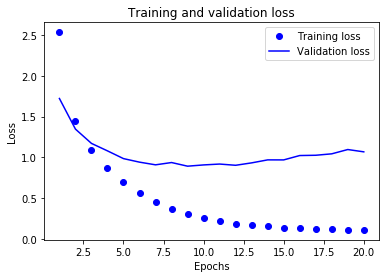

In [166]:
import matplotlib.pyplot as plt

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

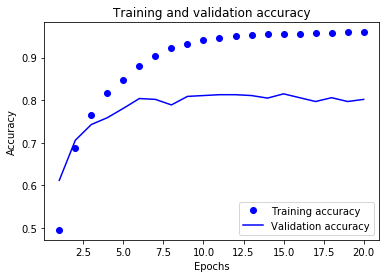

In [167]:
plt.clf
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [168]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 166us/step


[1.2091523794223449, 0.7782724844698171]

In [169]:
fit_result = model.fit(x_test,
                      one_hot_test_labels,
                      epochs=9,
                      batch_size=512,
                      validation_data=(x_val, y_val))

Train on 2246 samples, validate on 1000 samples
Epoch 1/9
2246/2246 [==============================] - 0s 137us/step - loss: 1.1654 - acc: 0.7894 - val_loss: 0.9836 - val_acc: 0.8080
Epoch 2/9
2246/2246 [==============================] - 0s 137us/step - loss: 0.7815 - acc: 0.8455 - val_loss: 0.9745 - val_acc: 0.8270
Epoch 3/9
2246/2246 [==============================] - 0s 143us/step - loss: 0.6083 - acc: 0.8762 - val_loss: 0.9593 - val_acc: 0.8100
Epoch 4/9
2246/2246 [==============================] - 0s 138us/step - loss: 0.4996 - acc: 0.8963 - val_loss: 0.9334 - val_acc: 0.8250
Epoch 5/9
2246/2246 [==============================] - 0s 139us/step - loss: 0.4156 - acc: 0.9145 - val_loss: 0.9283 - val_acc: 0.8150
Epoch 6/9
2246/2246 [==============================] - 0s 138us/step - loss: 0.3508 - acc: 0.9310 - val_loss: 0.9255 - val_acc: 0.8160
Epoch 7/9
2246/2246 [==============================] - 0s 140us/step - loss: 0.3033 - acc: 0.9435 - val_loss: 0.9627 - val_acc: 0.8070
Epoch 8

In [170]:
fit_history = fit_result.history

loss_values = fit_history['loss']
val_loss_values = fit_history['val_loss']
acc_values = fit_history['acc']
val_acc_values = fit_history['val_acc']

epochs = range(1, len(loss_values) + 1)

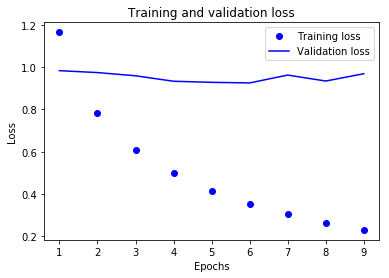

In [171]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

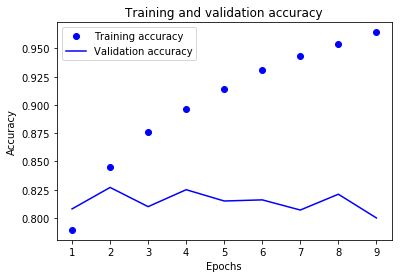

In [172]:
plt.clf
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [173]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 137us/step


[0.20838779041200267, 0.9701691896174491]

## Generating predictions for new data

In [174]:
predictions = model.predict(x_test)
predictions

array([[1.7689915e-06, 4.3016043e-06, 1.4214395e-08, ..., 2.6553795e-09,
        2.1999975e-09, 5.4099908e-10],
       [4.5880795e-05, 2.5309380e-05, 1.6542923e-09, ..., 5.1260685e-10,
        3.2432329e-08, 6.8168958e-07],
       [5.3255481e-04, 9.8718619e-01, 1.1841641e-05, ..., 5.0814062e-08,
        6.8328421e-07, 1.7667918e-07],
       ...,
       [1.9593092e-07, 2.1525400e-06, 6.1515500e-08, ..., 1.0296201e-09,
        1.5884844e-08, 3.8887757e-10],
       [3.1456776e-04, 4.5678681e-03, 3.3062555e-05, ..., 1.1898009e-06,
        4.5011578e-07, 1.3868423e-07],
       [1.5783512e-06, 3.9408314e-03, 4.3587969e-03, ..., 2.1782595e-08,
        1.4140086e-10, 1.9545874e-08]], dtype=float32)

In [175]:
np.sum(predictions[sample])

1.0000001